<a href="https://colab.research.google.com/github/nikhilrangaram/Covid-19-detection-using-cnn/blob/main/Covid_19_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

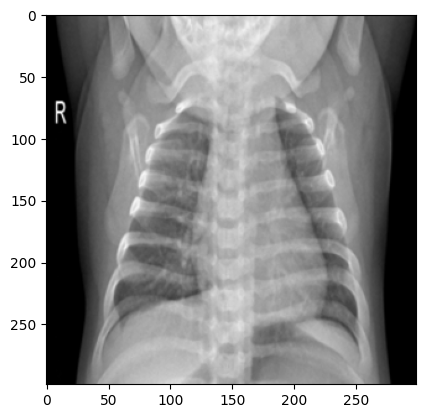

In [31]:
img = cv2.imread('/content/drive/MyDrive/dataset/Normal/images/Normal-105.png')
plt.imshow(img)
plt.show()

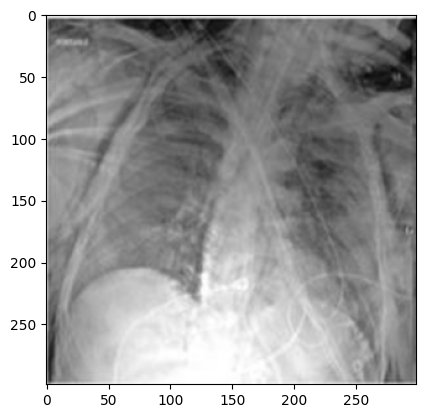

In [32]:
img = cv2.imread('/content/drive/MyDrive/dataset/COVID/images/COVID-325.png')
plt.imshow(img)
plt.show()

In [56]:
df = pd.read_excel('/content/drive/MyDrive/dataset/COVID.metadata.xlsx')
urls = os.listdir('/content/drive/MyDrive/dataset/COVID/images')
path = "/content/drive/MyDrive/dataset/COVID/images/" + urls[0]

df = pd.read_excel('/content/drive/MyDrive/dataset/Normal.metadata.xlsx')
urls = os.listdir('/content/drive/MyDrive/dataset/Normal/images')
path = "/content/drive/MyDrive/dataset/Normal/images/" + urls[0]

def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels


In [57]:
covid_path = "/content/drive/MyDrive/dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [58]:
normal_path = "/content/drive/MyDrive/dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [59]:
data = np.r_[covidImages, normalImages]
targets = np.r_[covidTargets, normalTargets]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3)

In [61]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100, 100, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 16)      

In [63]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
44/44 [==============================] - 13s 278ms/step - loss: 0.3927 - accuracy: 0.8262 - val_loss: 0.1381 - val_accuracy: 0.9585
Epoch 2/5
44/44 [==============================] - 12s 281ms/step - loss: 0.1638 - accuracy: 0.9430 - val_loss: 0.1269 - val_accuracy: 0.9685
Epoch 3/5
44/44 [==============================] - 12s 278ms/step - loss: 0.1485 - accuracy: 0.9523 - val_loss: 0.1065 - val_accuracy: 0.9668
Epoch 4/5
44/44 [==============================] - 12s 275ms/step - loss: 0.1207 - accuracy: 0.9594 - val_loss: 0.1046 - val_accuracy: 0.9718
Epoch 5/5
44/44 [==============================] - 13s 288ms/step - loss: 0.1197 - accuracy: 0.9665 - val_loss: 0.0988 - val_accuracy: 0.9701


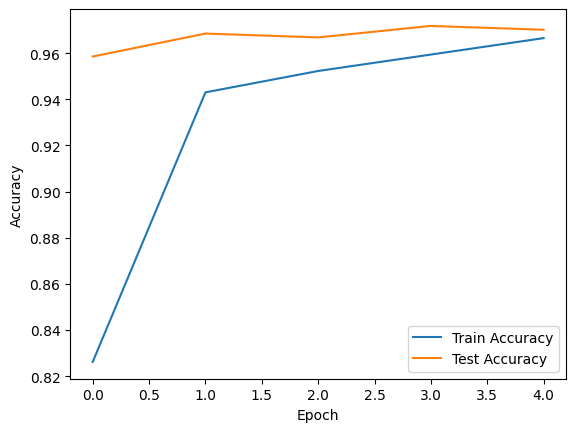

In [64]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Final Train Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)

Final Train Accuracy: 0.9679487347602844
Final Test Accuracy: 0.9701492786407471


In [75]:
def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return 'COVID'
    else:
        return 'Not COVID'

new_image_path = '/content/drive/MyDrive/new_data/COVID/COVID-1543.png'
classification = classify_image(new_image_path)
print('Classification:', classification)

1/1 [==============================] - 0s 24ms/step
Classification: COVID
